### **Intro**

We are interested in the convergence rate of the Conjugate Gradient Method and it's relationship to eigenvalues distributions. This notebook is a trying to replicate the experiment presented in Professor's Greenbaum's work in chapter 3 of the book. 

We consider a $n\times n$ SPD matrix with eigenvalues paramaterized by: 

$$
\lambda_i = \lambda_1 + \frac{i - 1}{n - 1} \rho^{n - i}, i = 2, \cdots, n - 1
$$

Where $\rho$ is taken to be a number between $0, 1$. The algorithm's behavior should be invariant under Unitary Transform. This is true due to the minmax polynomial property for the matrix polynomial. Therefore, the black box function will be using a diagonal matrix whose diagonal are values generated by the above expression. This makes the computational speed on exact arithematic faster. 


In [1]:
### All the messy code is imported here. 
include("CG_Convergence.jl")

InfNan2Zero (generic function with 1 method)

### Visualize the Distribution of the Eigenvalues on the real line

The expression generate a sequence of increasing eigenvalues. The sequence is oncreasing like the function $i\rho^i$, uniform when $\rho = 1$. 

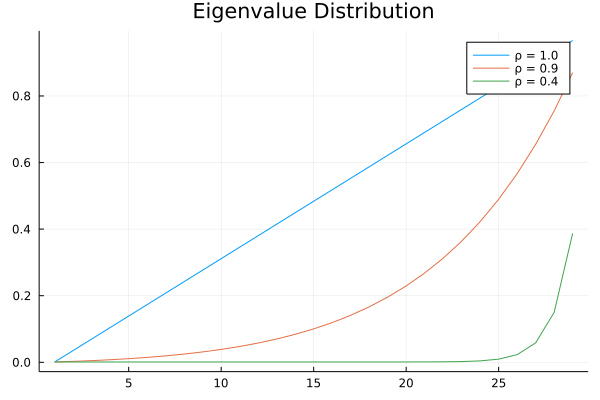

In [2]:
n = 30
λ1 = 0.001
fig = plot(title="Eigenvalue Distribution")
Eigenvalues = nothing
for ρ = [1, 0.9, 0.4]
    EigenValues = Vector{Float64}()
    for i in 1: n - 1 
        push!(EigenValues, λ1 + ((i - 1)/(n - 1))*ρ^(n - i))
    end
    plot!(fig, EigenValues, label="ρ = $(ρ)")
    
end
fig



### Floating Point Convergence Plot

Let's try out for different values of $\rho$ under Float64 Arithematic, using the Lanczos based Conjugate Gradient. 

**Important Information:** 

The algorithm in use under this context is the CG Based on the Lanczos Iteration and LDL decomposition of the Tridiagonal. 


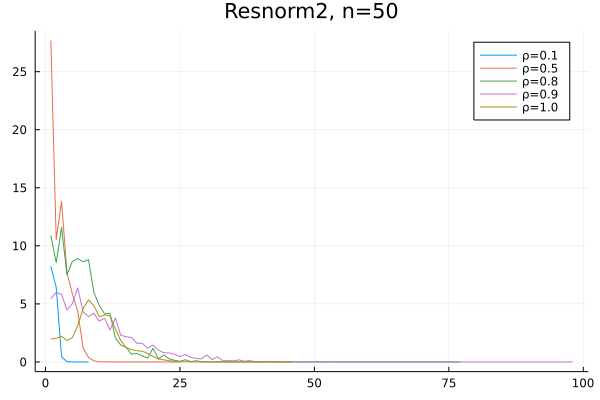

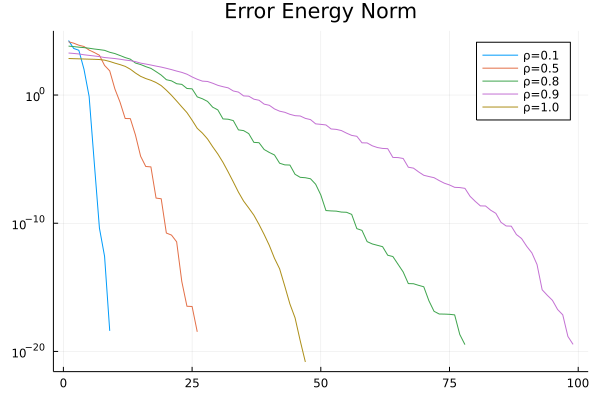

In [3]:

n = 50
fig1 = plot(title="Resnorm2, n=$(n)")
fig2 = plot(title="Error Energy Norm")
for ρ = [0.1, 0.5, 0.8, 0.9, 1]
    A = GetNastyPSDMatrix(ρ, n)  # A random matrix
    b = rand(size(A, 2))
    cg, Guesses, ResNorm = RunCGTillEnd(A, b, maxitr=2000, epsilon=1e-10)
    plot!(fig1, ResNorm, label="ρ=$(ρ)")
    plot!(fig2, EnergyErrorNorm(A, b, Guesses), yaxis=:log10, label="ρ=$(ρ)")
    
end
display(fig1)
display(fig2)


### **Exact Arithematic Example**

Now Let's try it out for Exact Arithemtic Computations. 

**Important Information**

* The algorithm in used here is the original version of the CG algorithm. Direct without the LDL decomposition. 

* The reason behind is that, the $LDL^T$ of $T_k$ involves the computation of norm, which has sqrt, and that impedes the ability to use Rational Numbers for the computations. 

Minimizing: (thresh = 1e-10, value = 3.01606)

Minimizing: Time: 0:00:00 (7 iterations)


Minimizing: (thresh = 1e-10, value = 0.145559)

Minimizing: (thresh = 1e-10, value = 0.00120203)

Minimizing: (thresh = 1e-10, value = 7.45006e-05)

Minimizing: (thresh = 1e-10, value = 2.43671e-06)

Minimizing: (thresh = 1e-10, value = 1.33437e-08)

Minimizing: (thresh = 1e-10, value = 2.2308e-10)

Minimizing: Time: 0:00:01 (17 iterations)


Minimizing: (thresh = 1e-10, value = 6.80875)

Minimizing: (thresh = 1e-10, value = 3.8313)

Minimizing: (thresh = 1e-10, value = 3.24446)

Minimizing: (thresh = 1e-10, value = 2.13305)

Minimizing: (thresh = 1e-10, value = 1.24624)

Minimizing: (thresh = 1e-10, value = 0.985655)

Minimizing: (thresh = 1e-10, value = 0.595141)

Minimizing: (thresh = 1e-10, value = 0.434779)

Minimizing: (thresh = 1e-10, value = 0.415316)

Minimizing: (thresh = 1e-10, value = 0.22071)

Minimizing: (thresh = 1e-10, value = 0.124439)

Minimizing: (thresh = 1e-10, value = 0.0628421)

Minimizing: (thresh = 1e-10, value = 0.04089)

Minimizing: (thresh = 1e-10, value = 0.0204178)

Minimizing: (thresh = 1e-10, value = 0.0104453)

Minimizing: (thresh = 1e-10, value = 0.00364333)

Minimizing: (thresh = 1e-10, value = 0.000696641)

Minimizing: (thresh = 1e-10, value = 0.000273488)

Minimizing: (thresh = 1e-10, value = 9.53644e-05)

Minimizing: (thresh = 1e-10, value = 3.33979e-05)

Minimizing: (thresh = 1e-10, value = 6.10434e-06)

Minimizing: (thresh = 1e-10, value = 1.11028e-06)

Minimizing: (thresh = 1e-10, value = 2.46019e-07)

Minimizing: (thresh = 1e-10, value = 3.30841e-08)

Minimizing: (thresh = 1e-10, value = 3.09092e-09)

Minimizing: (thresh = 1e-10, value = 2.25695e-10)

Minimizing: Time: 0:00:31 (37 iterations)


Minimizing: (thresh = 1e-10, value = 4.59004)

Minimizing: (thresh = 1e-10, value = 3.07063)

Minimizing: (thresh = 1e-10, value = 2.79101)

Minimizing: (thresh = 1e-10, value = 2.24741)

Minimizing: (thresh = 1e-10, value = 1.98941)

Minimizing: (thresh = 1e-10, value = 2.02232)

Minimizing: (thresh = 1e-10, value = 1.35242)

Minimizing: (thresh = 1e-10, value = 1.1781)

Minimizing: (thresh = 1e-10, value = 1.05657)

Minimizing: (thresh = 1e-10, value = 1.04478)

Minimizing: (thresh = 1e-10, value = 0.661392)

Minimizing: (thresh = 1e-10, value = 0.755555)

Minimizing: (thresh = 1e-10, value = 0.722699)

Minimizing: (thresh = 1e-10, value = 0.299631)

Minimizing: (thresh = 1e-10, value = 0.257672)

Minimizing: (thresh = 1e-10, value = 0.241827)

Minimizing: (thresh = 1e-10, value = 0.150135)

Minimizing: (thresh = 1e-10, value = 0.14493)

Minimizing: (thresh = 1e-10, value = 0.0863333)

Minimizing: (thresh = 1e-10, value = 0.0862615)

Minimizing: (thresh = 1e-10, value = 0.0544038)

Minimizing: (thresh = 1e-10, value = 0.0380367)

Minimizing: (thresh = 1e-10, value = 0.0266415)

Minimizing: (thresh = 1e-10, value = 0.019207)

Minimizing: (thresh = 1e-10, value = 0.0143547)

Minimizing: (thresh = 1e-10, value = 0.0100369)

Minimizing: (thresh = 1e-10, value = 0.00474676)

Minimizing: (thresh = 1e-10, value = 0.00273296)

Minimizing: (thresh = 1e-10, value = 0.00160986)

Minimizing: (thresh = 1e-10, value = 0.000944783)

Minimizing: (thresh = 1e-10, value = 0.000463599)

Minimizing: (thresh = 1e-10, value = 0.000189865)

Minimizing: (thresh = 1e-10, value = 9.06956e-05)

Minimizing: (thresh = 1e-10, value = 3.39215e-05)

Minimizing: (thresh = 1e-10, value = 7.82262e-06)

Minimizing: (thresh = 1e-10, value = 3.23581e-06)

Minimizing: (thresh = 1e-10, value = 5.78452e-07)

Minimizing: Time: 0:01:21 (49 iterations)


Minimizing: (thresh = 1e-10, value = 2.65629)

Minimizing: (thresh = 1e-10, value = 2.17838)

Minimizing: (thresh = 1e-10, value = 1.27946)

Minimizing: (thresh = 1e-10, value = 0.860776)

Minimizing: (thresh = 1e-10, value = 0.641105)

Minimizing: (thresh = 1e-10, value = 0.470239)

Minimizing: (thresh = 1e-10, value = 0.438967)

Minimizing: (thresh = 1e-10, value = 0.445954)

Minimizing: (thresh = 1e-10, value = 0.338047)

Minimizing: (thresh = 1e-10, value = 0.250927)

Minimizing: (thresh = 1e-10, value = 0.177874)

Minimizing: (thresh = 1e-10, value = 0.0988458)

Minimizing: (thresh = 1e-10, value = 0.0566206)

Minimizing: (thresh = 1e-10, value = 0.0390798)

Minimizing: (thresh = 1e-10, value = 0.0286556)

Minimizing: (thresh = 1e-10, value = 0.0188484)

Minimizing: (thresh = 1e-10, value = 0.00899484)

Minimizing: (thresh = 1e-10, value = 0.00394899)

Minimizing: (thresh = 1e-10, value = 0.00231722)

Minimizing: (thresh = 1e-10, value = 0.00108827)

Minimizing: (thresh = 1e-10, value = 0.000511062)

Minimizing: (thresh = 1e-10, value = 0.000213578)

Minimizing: (thresh = 1e-10, value = 0.000112103)

Minimizing: (thresh = 1e-10, value = 4.76554e-05)

Minimizing: (thresh = 1e-10, value = 2.15294e-05)

Minimizing: (thresh = 1e-10, value = 6.20341e-06)

Minimizing: (thresh = 1e-10, value = 2.45976e-06)

Minimizing: (thresh = 1e-10, value = 9.08211e-07)

Minimizing: (thresh = 1e-10, value = 3.43332e-07)

Minimizing: (thresh = 1e-10, value = 9.18468e-08)

Minimizing: (thresh = 1e-10, value = 2.63648e-08)

Minimizing: (thresh = 1e-10, value = 5.44182e-09)

Minimizing: (thresh = 1e-10, value = 1.2159e-09)

Minimizing: (thresh = 1e-10, value = 2.20713e-10)

Minimizing: Time: 0:00:42 (46 iterations)


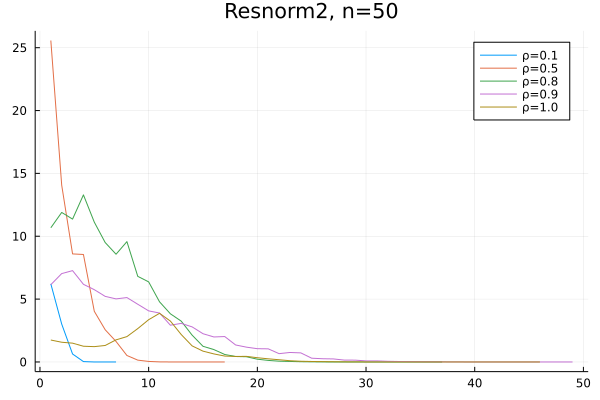

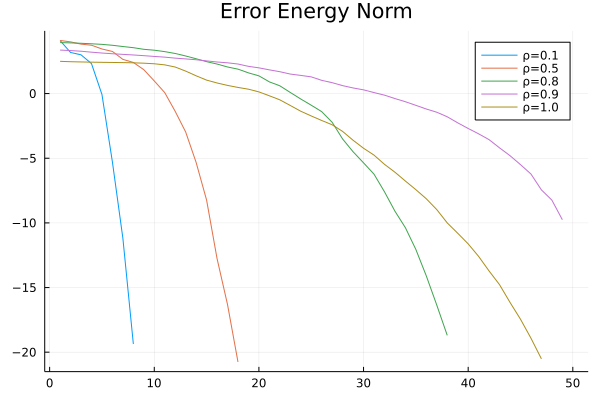

In [4]:
n = 50
fig1 = plot(title="Resnorm2, n=$(n)")
fig2 = plot(title="Error Energy Norm")

for ρ = [0.1, 0.5, 0.8, 0.9, 1]
    A = GetNastyPSDMatrix(ρ, n)  # A random matrix
    b = rand(size(A, 2))
    A = convert(Matrix{Rational{BigInt}}, A)
    b = convert(Vector{Rational{BigInt}}, b)
    cg, Guesses, ResNorm = RunCGTillEnd(
        A, b, 
        maxitr=2000, 
        epsilon=1e-10, 
        cg_implementation=Sproj.IterativeCGOriginal
    )
    plot!(fig1, ResNorm, label="ρ=$(ρ)")
    plot!(fig2, EnergyErrorNorm(A, b, Guesses) .|> log10.|> InfNan2Zero, label="ρ=$(ρ)")
    
end
display(fig1)
display(fig2)

### EigenValues distribution of the $T_k$ Tridiagonal 

This should asserts some of the claims. 